# Splines

Spline polynomials are used to approximate a function with lower-order polynomials in a piece-wise fashion. 


## `CubicSpline` function
We can use [`CublicSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) function which is a part of `scipy.interpolate` library for interpolation via cubic spline. `CubicSpline` allows specification of boundary conditions. It also outputs the derivatives of the spline curve in addition to its value.

### Example 1

Below the data points are provided for variation of density as a function of temperature. Using cubic spline find the density at $T=350$ $K$. Plot the spline curve along with the data.

At T= 350 : Density =  0.5590832262446761


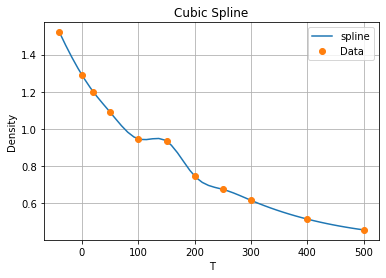

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
T = np.array([-40., 0., 20., 50., 100., 150., 200., 250., 300., 400., 500.])
density = np.array([1.52, 1.29, 1.2, 1.09, 0.946, 0.935, 0.746, 0.675, .616, 0.515, 0.457])
cs = CubicSpline(T, density)
T1 = 350
density1 = cs(T1)
print('At T=',T1, ': Density = ', density1)

# Plotting the spline along with the data
import matplotlib.pyplot as plt
Tp = np.linspace(np.min(T),np.max(T))
densityp = cs(Tp)   #getting the density values corresponding to Tp from the cubic spline output
plt.plot(Tp,densityp, label='spline')
plt.plot(T,density,'o', label='Data')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('Density')
plt.title('Cubic Spline')
plt.show();

As shown, the cubic spline provides a smooth curve that passes through all data points.

### Derivatives of the spline function

The output of spline includes the derivatives of the spline function. Let the output be assigned to variable called `c`:
* `c(:,1)`: the 1st derivative
* `c(:,2)`: the 2nd derivative 
* `c(:,3)`: the 3rd derivative. Since the this spline is a cubic function. The 3rd derivative consists of piece-wise constants. Higher derivatives are zeros.

In the following plot, we plot the first three derivative of density from the previous example.

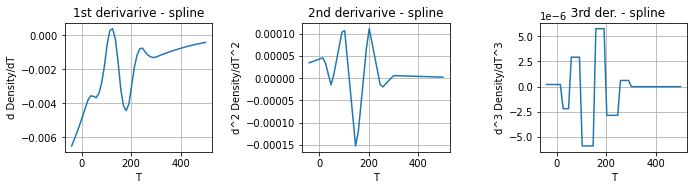

In [3]:
# Plotting derivative of the cubic spline function
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.plot(Tp,cs(Tp,1))   #cs(:,1) contains the 1st derivative
plt.grid(True)
plt.xlabel('T')
plt.ylabel('d Density/dT')
plt.title('1st derivarive - spline')
plt.subplot(132)
plt.plot(Tp,cs(Tp,2)) #cs(:,2) contains the 2nd derivative
plt.grid(True)
plt.xlabel('T')
plt.ylabel('d^2 Density/dT^2')
plt.title('2nd derivarive - spline')
plt.subplot(133)
plt.plot(Tp,cs(Tp,3)) #cs(:,3) contains the 3rd derivative
plt.grid(True)
plt.xlabel('T')
plt.ylabel('d^3 Density/dT^3')
plt.title('  3rd der. - spline')
plt.tight_layout(pad=2) #put spacing between the subplots
plt.show();

### Example 2

Apply the cubic spline to approximate $f(x)={1 \over 1+25x^2}$ in the range $[-1,1]$.

We first generate 9 data points. These points are used to generate the spline curve.

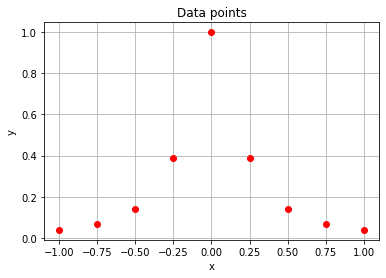

In [4]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Generating 9 data points
xdata = np.linspace(-1,1,9)
ydata = 1/(1 + 25 * xdata**2)
plt.plot(xdata,ydata,'ro')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.show();


Now, we generate the spline based the 9 data points and compare it with the actual function $f(x)={1 \over 1+25x^2}$.

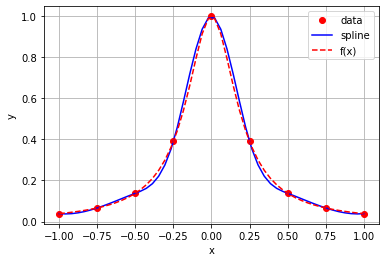

In [5]:
xp = np.linspace(-1,1)     # x array for plotting
yp =  1/(1 + 25 * xp**2)  # y array for plotting
sp = CubicSpline(xdata, ydata)  #spline based the 9 data points
yspline = sp(xp)          # y interpolated from spline at xp points
plt.plot(xdata,ydata,'ro', label ='data') # plot the data
plt.plot(xp,yspline, 'b-', label = 'spline') # plot the spline curve
plt.plot(xp,yp, 'r--', label = 'f(x)') # plot the spline curve
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show();


As shown, the spline generate base of only 9 data points matches very well with the actual function.

### End Conditions

To control the end points of the spline we use the parameter `bc_type`. In the following example we approximate the `sin` function with a cubic spline. We obtain the spline curve with several boundary conditions and plot:
* we plot the default spline (not-a-knot condition). The 1st and 2nd segments as well as the last one and the one before the last are the same polynomial. It is a good default when there is no information on boundary conditions.
* we plot the spline with natural end condition (the 2nd derivative at curve ends are zero)
* we plot the spline with clamped ends (i.e., the first derivative zero at both ends) using `bc_type='clamped'`.
* we plot the spline with specified first derivative at end points using `bc_type='((1, -2 ), (1, -3))'` in which **1** refers to the first derivative. For demonstration, we assign the first derivative of -2 to the left and -3 to the right boundaries.
* we plot the spline with specified second derivative at end points using `bc_type='((2, 5 ), (2, -5))'` in which **2** refers to the first derivative. For demonstration, we assign the second derivative of 5 to the left and -5 to the right boundaries.



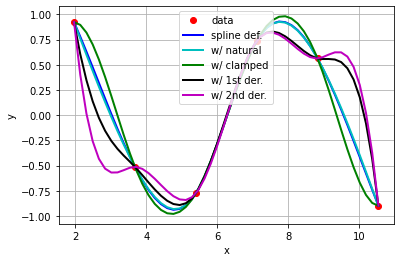

In [6]:
xd = np.linspace(np.pi/1.6,np.pi/1.8+2.8*np.pi,6)
yd = np.sin(xd)
plt.plot(xd,yd,'ro', label='data')

xp = np.linspace(np.pi/1.6,np.pi/1.8+2.8*np.pi)

sp = CubicSpline(xd, yd )                          # spline (default, not-a-knot)
plt.plot(xp,sp(xp), 'b-', linewidth = 2, label = 'spline def.')

sp = CubicSpline(xd, yd , bc_type = 'natural')                          # spline (default, not-a-knot)
plt.plot(xp,sp(xp), 'c-', linewidth = 2, label = 'w/ natural')


sp = CubicSpline(xd, yd, bc_type = 'clamped')      # spline: clamped ends (zero derivative)
plt.plot(xp,sp(xp), 'g-', linewidth = 2, label = 'w/ clamped')

sp = CubicSpline(xd, yd, bc_type= ((1, -2 ), (1, -3)) )      # spline: 1st derivative specified as -2 and -3 on the left and right boundaries, respectively.
plt.plot(xp,sp(xp), 'k-', linewidth = 2, label = 'w/ 1st der.')

sp = CubicSpline(xd, yd, bc_type= ((2, 5 ), (2, -5)) )      # spline: 2nd derivative specified  as 5 and -5 on the left and right boundaries, respectively.
plt.plot(xp,sp(xp), 'm-', linewidth = 2, label = 'w/ 2nd der.')


plt.legend(loc='upper center')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## `interp1d` function

We can use [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) function which is a part of `scipy.interpolate` library for interpolation. This method can perform interpolation using various methods which can be specified using the `kind` input parameter as follows.

`kind` specifies the kind of interpolation as a string (`linear`, `nearest`, `zero`, `slinear`, `quadratic`, `cubic`, `previous`, `next`, where `zero`, `slinear`, `quadratic` and `cubic` refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point) or as an integer specifying the order of the spline interpolator to use. **Default is `linear`**.

## Example 3

Repeat Example 1 with `interp1d`

At T= 350 : Density =  0.5655


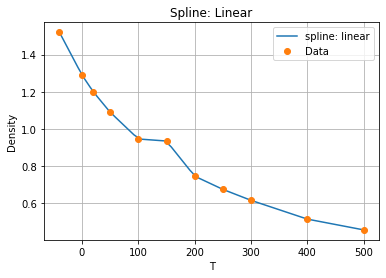

In [7]:
import numpy as np
from scipy.interpolate import interp1d
T = np.array([-40., 0., 20., 50., 100., 150., 200., 250., 300., 400., 500.])
density = np.array([1.52, 1.29, 1.2, 1.09, 0.946, 0.935, 0.746, 0.675, .616, 0.515, 0.457])
f = interp1d(T, density, kind = 'linear')
T1 = 350
density1 = f(T1)
print('At T=',T1, ': Density = ', density1)

# Plotting the spline along with the data
import matplotlib.pyplot as plt
Tp = np.linspace(np.min(T),np.max(T))
densityp = f(Tp)   #getting the density values corresponding to Tp from the cubic spline output
plt.plot(Tp,densityp, label='spline: linear')
plt.plot(T,density,'o', label='Data')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('Density')
plt.title('Spline: Linear')
plt.show();

As shown, with linear spline the data points are connected with straight lines.

# Exercise

Generate data points for the sine function between $0$ and $2\pi$. Generate 5 data points from the function and based on those, obtain the linear, quadratics and cubic splines. Compare the results with the original function.